In [2]:
# import requried libraries.
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset.
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# describing the basic statistics.
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# displaying the metadata.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# checking the null values count per column.
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# filling the age null values with the medain of the age column.
df['age'] = df['age'].fillna(df['age'].median())
df['age'].isnull().sum()

np.int64(0)

In [14]:
# filling the embarked and embarked_town null vlaues with their mode.
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
print('Embarked null values count:', df['embarked'].isnull().sum())
print('Embark town null values count:', df['embark_town'].isnull().sum())

Embarked null values count: 0
Embark town null values count: 0


In [15]:
df.drop(columns=['deck'], inplace=True)

In [16]:
# determining the null valued columns if exists.
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

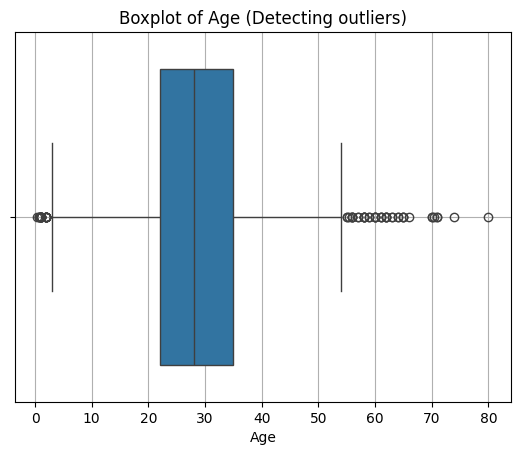

In [67]:
# detecting outliers.
sns.boxplot(data=df, x='age')
plt.title('Boxplot of Age (Detecting outliers)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

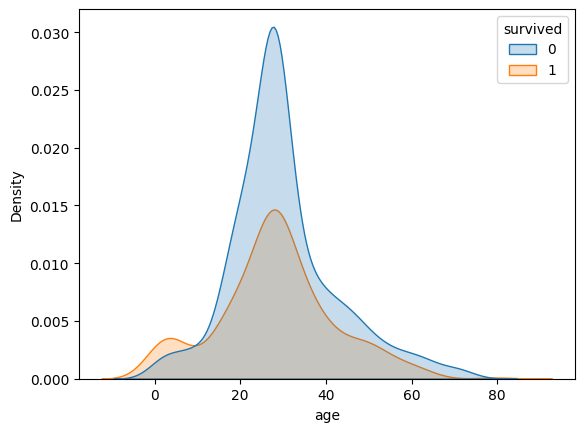

In [58]:
sns.kdeplot(data=df, x='age', hue='survived', fill=True)
plt.show()

In [41]:
# sexwise count of people not survived.
survived_count = df[df['survived'] == 0].groupby('sex').size()
survived_count

sex
female     81
male      468
dtype: int64

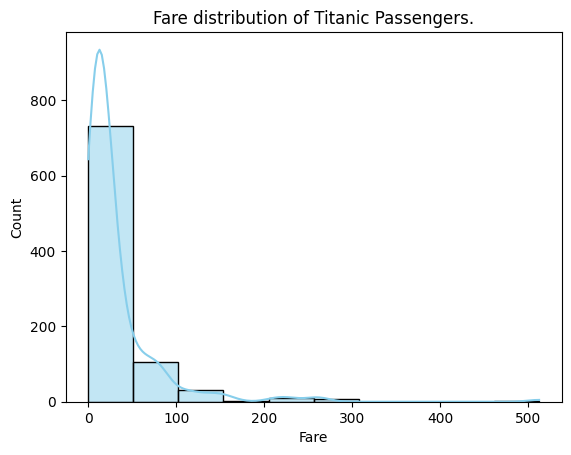

In [51]:
# histogram of the ticket fare distribution.

sns.histplot(data=df['fare'], bins=10, kde=True, color='skyblue')
plt.title('Fare distribution of Titanic Passengers.')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

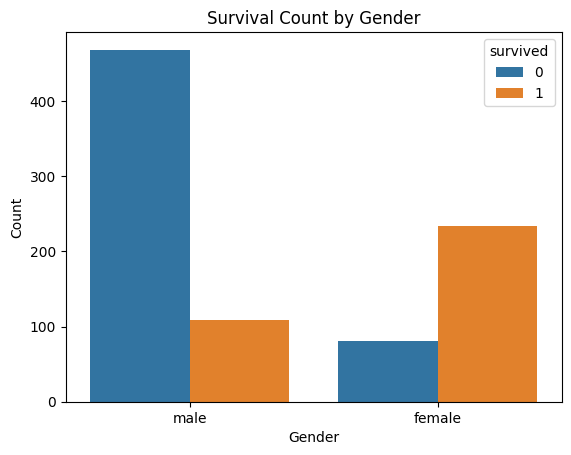

In [60]:
# survival count by gender.
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

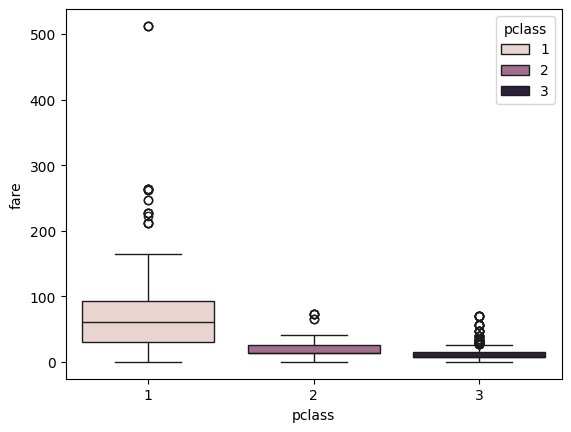

In [65]:
# boxplot fare by passenger class.
sns.boxplot(data=df, x='pclass', y='fare', hue='pclass')
plt.show()

/var/folders/vc/x0js5pdx54jgz2lkj9zlbygw0000gn/T/ipykernel_47660/2386947096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='age', data=df, palette='Set2')


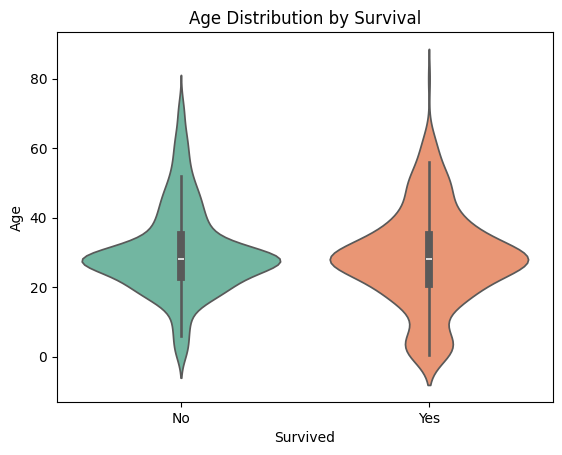

In [75]:
# violin plot for age distribution.
sns.violinplot(x='survived', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()